In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict
import apriori

In [2]:
f = open('speakers.txt', 'r')
lines = f.readlines()
f.close()

In [3]:
names = []
skills = []
votes = []
for line in lines:
    if line.find('#') != 0:
        if line.find('\t') == 0:
            arr = line.strip().split('\t')
            skill = arr[0]
            vote = arr[1]
            names.append(name)
            skills.append(skill)
            votes.append(vote)
        else:
            name = line.strip().title()

df = pd.DataFrame({'name': names, 'skill': skills, 'votes': votes})

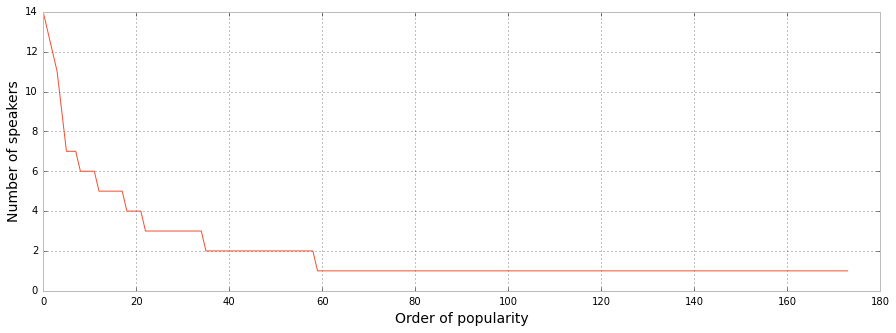

In [4]:
gb = df.groupby(['skill'])['name'].count()
gb.sort(ascending=0)
plt.figure(figsize=(15,5))
x = np.arange(len(gb))
plt.plot(x, gb)
plt.ylabel('Number of speakers', fontsize=14)
plt.xlabel('Order of popularity', fontsize=14)
plt.show()

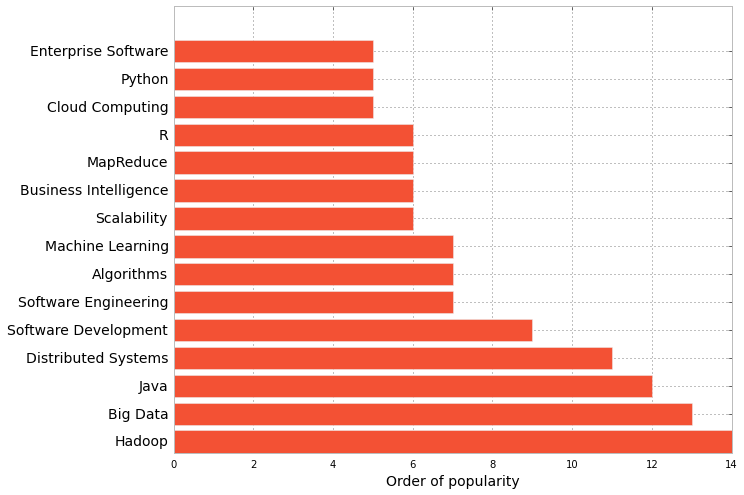

In [5]:
gb = df.groupby(['skill'])['name'].count()
gb.sort(ascending=0)
plt.figure(figsize=(10,8))
gbs = gb[0:15]
x = np.arange(len(gbs))
plt.barh(x, gbs)
plt.yticks(x+0.4, gbs.index, fontsize=14)
plt.xlabel('Order of popularity', fontsize=14)
plt.show()

In [6]:
g1 = df[df.skill=='R']['name']
g2 = df[df.skill=='Machine Learning']['name']
set(g1).intersection(set(g2))

{'Benjamin Uminsky',
 'Gian Gonzanga\tH',
 'Jim Mcguire',
 'Kyle Polich',
 'Szilard Pafka'}

In [7]:
len(set(df['name']))

35

In [8]:
s = ''
for n in g1:
    s = s + n + ', '
print s
s = ''
for n in g2:
    s = s + n + ', '
print s


Amelia Mcnamara, Benjamin Uminsky, Gian Gonzanga	H, Jim Mcguire, Kyle Polich, Szilard Pafka, 
Benjamin Uminsky, Brian Kursar, Gian Gonzanga	H, Jim Mcguire, Kyle Polich, Szilard Pafka, Ulas Bardak, 


In [9]:
skills = []
for name in set(df.name):
    speaker = df[df.name==name]['skill'].tolist()
    skills.append(speaker)

In [14]:
ap = apriori.apriori(skills, 0.05)
ex = pd.DataFrame(ap)
ex

,count,items,set,support
0,14,set([Hadoop]),"set([1, 2, 4, 5, 6, 9, 11, 12, 34, 22, 23, 25,...",0.080460
1,11,set([Distributed Systems]),"set([1, 2, 4, 6, 9, 11, 12, 20, 23, 25, 26])",0.063218
2,12,set([Java]),"set([1, 2, 4, 6, 9, 12, 13, 19, 20, 22, 23, 28])",0.068966
3,9,set([Software Development]),"set([34, 3, 11, 12, 18, 20, 23, 28, 30])",0.051724
4,13,set([Big Data]),"set([33, 2, 4, 9, 11, 12, 34, 14, 21, 23, 24, ...",0.074713
5,8,"set([Hadoop, Big Data])","set([Hadoop, Big Data])",0.228571
6,5,"set([Java, Big Data])","set([Java, Big Data])",0.142857
7,4,"set([Software Development, Java])","set([Software Development, Java])",0.114286
8,10,"set([Hadoop, Distributed Systems])","set([Hadoop, Distributed Systems])",0.285714
9,7,"set([Big Data, Distributed Systems])","set([Big Data, Distributed Systems])",0.200000


In [16]:
ex[0:8][['items', 'count', 'support']]

,items,count,support
0,set([Hadoop]),14,0.080460
1,set([Distributed Systems]),11,0.063218
2,set([Java]),12,0.068966
3,set([Software Development]),9,0.051724
4,set([Big Data]),13,0.074713
5,"set([Hadoop, Big Data])",8,0.228571
6,"set([Java, Big Data])",5,0.142857
7,"set([Software Development, Java])",4,0.114286


In [23]:
g1 = df[df.skill=='Hadoop']['name']
g2 = df[df.skill=='Distributed Systems']['name']
g3 = df[df.skill=='Java']['name']
g4 = df[df.skill=='Big Data']['name']
(set(g1).intersection(set(g2)).intersection(set(g3)).intersection(set(g4)))

{'Alan Gates',
 'Ashish Singh',
 'Jonathan Gray',
 'Michael Stack',
 'Vinayak Borkar'}

In [25]:
minimums = np.arange(50) * .01 + .01
times = []
for m in minimums:
    start = time.time()
    ap = apriori.apriori(skills, m)
    end = time.time()
    dur = end-start
    times.append((m, dur, len(ap)))

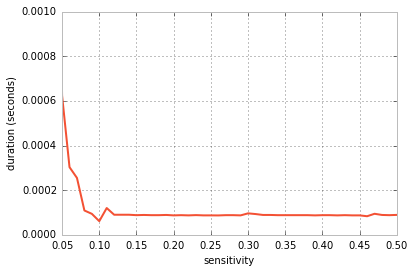

In [34]:
benchmark = pd.DataFrame(times)
benchmark.columns = ['min_sensitivity', 'duration', 'rules']

#plt.plot(benchmark.min_sensitivity, benchmark.rules)
plt.plot(benchmark.min_sensitivity, benchmark.duration, linewidth=2)
plt.xlim([0.05, .5])
plt.ylim([0, .001])
plt.xlabel('sensitivity')
plt.ylabel('duration (seconds)')
plt.show()

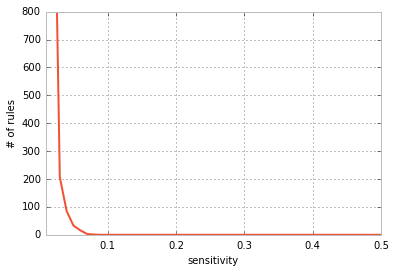

In [35]:
plt.plot(benchmark.min_sensitivity, benchmark.rules, linewidth=2)
plt.xlim([0.01, .5])
plt.ylim([0, 800])
plt.xlabel('sensitivity')
plt.ylabel('# of rules')
plt.show()